#"Failing to Success" ANN-approach: Convoluted Neural Network 

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
from PIL import Image
import pandas as pd
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

##Step 1: ANN-Approach 
In trying to get a high accuracy rate on the Fashion-MNIST Dataset, we first attempted to create an Artifical Neural Network with multiple different architectures. Below we will quickly show the results. Each Model was trained over 50 epochs. The changing of the learning rates seemed to increase the accuracy of the models up to a certain point - each model is shown up to the Learning rate where the accuracy did not increase anymore. The steps in the learning rate were 0.001, 0.002, 0.003, 0.005, 0.010 and then a raise of another 0.010 after that to monitor improvement. One model improved up to a learning rate of 0.080 - interestingly after starting out as the second-weakest model with a learning rate of 0.001 at 0.7138. The full table with all results can be seen below: 


In [2]:
model = ["2 layers(784,100,10)","2 layers(784,100,10)","2 layers(784,100,10)","2 layers(784,100,10)","2 layers(784,100,10)","3 layers (784,200,100,10)","3 layers (784,200,100,10)",
"3 layers (784,200,100,10)","3 layers (784,200,100,10)","3 layers (784,200,100,10)","3 layers (784,200,100,10)","3 layers (784,200,100,10)","3 layers (784,200,100,10)",
"3 layers (784,200,100,10)","3 layers (784,200,100,10)","3 layers (784,200,100,10)","4 Layers (784,392,196,49,10)","4 Layers (784,392,196,49,10)","4 Layers (784,392,196,49,10)",
"4 Layers (784,392,196,49,10)","4 Layers (784,392,196,49,10)","4 Layers (784,392,196,49,10)","4 Layers (784,392,196,49,10)","4 Layers (784,392,196,49,10)","4 Layers (784,392,196,49,10)",
"4 Layers (784,392,196,49,10)","4 Layers (784,392,196,49,10)","4 Layers (784,392,196,49,10)","5 Layers (784,392,196,98,49,10)","5 Layers (784,392,196,98,49,10)","5 Layers (784,392,196,98,49,10)",
"5 Layers (784,392,196,98,49,10)","5 Layers (784,392,196,98,49,10)","5 Layers (784,392,196,98,49,10)","5 Layers (784,392,196,98,49,10)","5 Layers (784,392,196,98,49,10)"]
lr = ["0.001","0.002","0.003","0.005","0.010","0.001","0.002","0.003","0.005","0.010","0.020","0.030","0.040","0.050","0.060","0.070","0.001","0.002","0.003","0.005","0.010","0.020",
"0.030","0.040","0.050","0.060","0.070","0.080","0.001","0.002","0.003","0.005","0.010","0.020","0.030","0.040"]
acc = ["0.7626","0.7815","0.7855","0.7846","0.7815","0.7459","0.774","0.7788","0.7843","0.8025","0.823","0.8359","0.8337","0.8367","0.8446","0.8413","0.7138","0.7511",
"0.7667","0.7839","0.8244","0.8355","0.8391","0.8475","0.8499","0.8538","0.8539","0.8485","0.6602","0.7436","0.7578","0.7962","0.8186","0.8284","0.837","0.8223"]

In [3]:
ANN_DF = {"Model": model,'Learning rate': lr, "Accuracy":acc}
ANN_DF = pd.DataFrame(data=ANN_DF)
ANN_DF.set_index(["Model"])

,Learning rate,Accuracy
Model,,
"2 layers(784,100,10)",0.001,0.7626
"2 layers(784,100,10)",0.002,0.7815
"2 layers(784,100,10)",0.003,0.7855
"2 layers(784,100,10)",0.005,0.7846
"2 layers(784,100,10)",0.010,0.7815
"3 layers (784,200,100,10)",0.001,0.7459
"3 layers (784,200,100,10)",0.002,0.774
"3 layers (784,200,100,10)",0.003,0.7788
"3 layers (784,200,100,10)",0.005,0.7843


##Summary:
In short, the highest Accuracy (0.8539) was achieved by a model with 4 layers - however, improvement beyond this seems to be hard to achieve. We could continue trying with more layers, though in the interests of time we will spare ourselves the efforts. We did not expect the ANN to be our top model, and therefore turned to an implementation with a CNN-Model to improve the accuracy.

##Step 2: CNN-Approach
**Loading the Data**

Using a CNN-Model, we will try to achieve a greater Accuracy. First, we will start by loading in the Fashion_MNIST Dataset and seperating both the training and testing Data: 

In [4]:
IMAGE_SIZE = 28
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

train_dataset = dsets.FashionMNIST(root='./data', train=True, download=True, transform=composed)
validation_dataset = dsets.FashionMNIST(root='./data', train=False, download=True, transform=composed)



Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Now that we have loaded the dataset, we will write the Model itself as a class. After some experimentation, we settled on writing a model with two convolutional layers between the input and the final prediction. We will also define the forward pass method to update the weights. 


In [5]:
class CNN(nn.Module):    
    # Constructor
    def __init__(self, out_1=3, out_2=12):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=3, stride = 2)
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=3, stride = 2)
        self.fc1 = nn.Linear(432,84) 
        self.fc2 = nn.Linear(84,10)   
        self.relu2 = nn.ReLU(inplace=True) # the non-linarity
        self.logsoftmax = nn.LogSoftmax(dim=1) # the softmax

    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.relu2(self.fc1(x))
        x = self.logsoftmax(self.fc2(x))
        return x
    
model = CNN(out_1=3, out_2=12)

**Scope of model**

We will then quickly inspect the scope of the model by looking at the numbers of parameters: 

In [6]:
num_params = 0
# iterate over the distinct parameters
for param in model.parameters():
    # collect number of parameters
    num_params += param.numel()
# print the number of model paramters
print('[LOG] Number of our CNN model parameters: {}.'.format(num_params))

[LOG] Number of our CNN model parameters: 38212.


Just as in the lectures, we observe a smaller number than in our ANN Models. 



**Learning rate and preparation of Batches**

We then instantiate the learning rate, and set the optimization process to Stochastic Gradial Descent. We want to set the learning rate to something reasonably high from the beginning, as we have seen from the ANN approach. We also prepare the batches that will be fed into our model:

In [7]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.02 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
train_val_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=30000) #for the training accuracy

validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000) #for the testing accuraccy



**Saving results**

Lastly, we will choose the number of epochs as well as create three empty lists where we can store the COST values as well as the accuracy of the model at every epoch so we can plot the results at the end. While our model trains, it will save the COST parameter, the training and testing accuracy of the model at each epoch, allowing us to then at the end select the best model from the list of accuracies:

In [8]:
n_epochs=20 
cost_list=[]
train_accuracy_list=[]
test_accuracy_list=[]
predictions = []
N_test=len(validation_dataset)
N_train_val=len(train_dataset)
COST=0

**The train_model function**

Finally, we define the function to train the model and let it run. This process will take about 10 minutes for 20 Epochs, and give us the three lists we described earlier. Our model will add the loss to the COST, (hopefully) decreasing it as it continues.

In [9]:
def train_model(n_epochs):
    for epoch in range(n_epochs):
        COST=0
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            COST+=loss.data       
        cost_list.append(COST)
        train_correct=0
        test_correct=0

        #perform predictions on training data:
        for tx_test, ty_test in train_val_loader:
            z = model(tx_test)
            _, tyhat = torch.max(z.data, 1)
            train_correct += (tyhat == ty_test).sum().item()
        accuracy_train = train_correct / N_train_val
        train_accuracy_list.append(accuracy_train)

        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            test_correct += (yhat == y_test).sum().item()
        accuracy_test = test_correct / N_test
        test_accuracy_list.append(accuracy_test)

        print("Epoch {} complete".format(epoch))

**Hyperparameter Tuning**

As we did not want to simply take the default values for the optimizer, we conducted a grid search over 12 combinations of hyperparameters for the learning rate and the momentum. We calculated the accuracy for each combination and stored it in a dictionary, from which we retrieved the combination with the highest accuracy achieved after 20 epochs. We commented out the code since it runs a very long time to get the accuracy of each combination of hyperparameters. But feel free to try it out!

Besides these hyperparameters we also tried out the Adam-optimization function and also applying Dropout-Layers to the CNN.


In [ ]:
#n_epochs=20
#param_dict = {'lr':[0.001,0.01,0.05,0.1], 'momentum':[0.4,0.6,0.9]}
#grid_dict = {}
#for lera in param_dict['lr']:
#    for moment in param_dict['momentum']:
#      accuracy_list = []
#      model = CNN(out_1=3, out_2=12)
#      optimizer = torch.optim.SGD(model.parameters(), lr = lera, momentum = moment)
#      key = 'lr='+ str(lera )+' momentum='+str(moment)
#      acc = train_model(n_epochs)
#      grid_dict[key] = acc

#max(grid_dict, key=grid_dict.get)

We then use the values that yielded the highest accuracy for training the CNN for even more Epochs. We saved the testing and the training accuracy as well as the cost to a list for further evaluation. In our grid search, the best hyperparameters were learning rate = 0.05 and momentum = 0.9. (This could change with a different seed) As 0.9 is exactly the default of Pytorch's opimizer, we can just pass no value to the optimizer.

**Running the model** 

We have finished our preparations and cna now run the model

In [ ]:
accuracy_list = []
lera = 0.05
n_epochs = 20 

model = CNN(out_1=3, out_2=12)
optimizer = torch.optim.SGD(model.parameters(), lr = lera)

train_model(n_epochs)

Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete


Ideally we will see the increase in Accuracy as well as the decrease in COST in our plots now and see a continuous improvement of our model:

**Inspecting performance**

**Training Accuracy**

Let us look at the Training accuracy (we expect this to be higher than the testing accuracy)

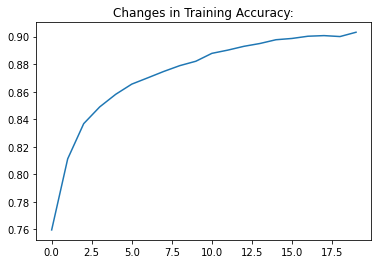

The highest Training Accuracy for this Model was 0.9032


In [ ]:
plt.plot(train_accuracy_list)
plt.title("Changes in Training Accuracy for simple CNN Model:")
plt.show()

print("The highest Training Accuracy for this Model was {}".format(round(max(train_accuracy_list),4)))

**COST decrease**

As predicted, we can also see a continuous decrease in the COST, implying that the model is indeed improving with more iterations. The curve soon starts to smooth out after the 10th iteration, implying that at this point accuracy improvemet will continue more slowly:

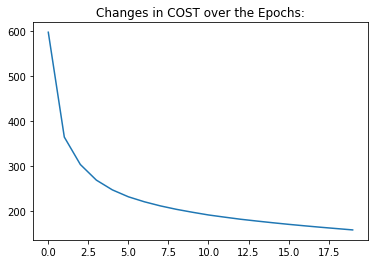

In [ ]:
plt.plot(cost_list)
plt.title("Changes in COST over the Epochs:")
plt.show()

**Testing Accuracy**

Let us then look at the Testing Accuracy (we expect this to be lower than the training accuracy):


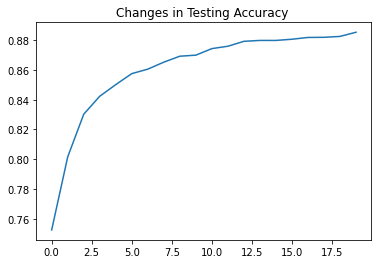

The highest Testing Accuracy for this Model 0.8853


In [ ]:
plt.plot(test_accuracy_list)
plt.title("Changes in Testing Accuracy for simple CNN Model")
plt.show()

print("The highest Testing Accuracy for this Model {}".format(round(max(test_accuracy_list),4)))

The training and testing accuracies do not differ wildly, implying that our model is somewhat generalized and is not overfitting massively. Next, we will load in the predictions of our best model and create a Confusion-Matrix to inspect where our model seems to be misclassifying:

**Preparation Confusion Matrix**

First, we load in the predictions into a list

In [ ]:
predictions = []
for x_test, y_test in validation_loader:
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            predictions.append(yhat)



We then concatenate the results of the predictions. We will quickly inspect whether we have gotten the correct model getting the Accuracy using the accuracy_score and checking whether it is the same as our best model: 

In [ ]:
pred_tensor = torch.cat((predictions[0], predictions[1]), 0)
metrics.accuracy_score(validation_dataset.targets, pred_tensor)

tensor([9, 2, 1,  ..., 8, 1, 5])


0.8853

It is, great! 

**Building Confusion Matrix**

Now we can start building the confusion matrix. We are looking for a strong cross-line which indicates correct classification among all classes. Let us take a look:

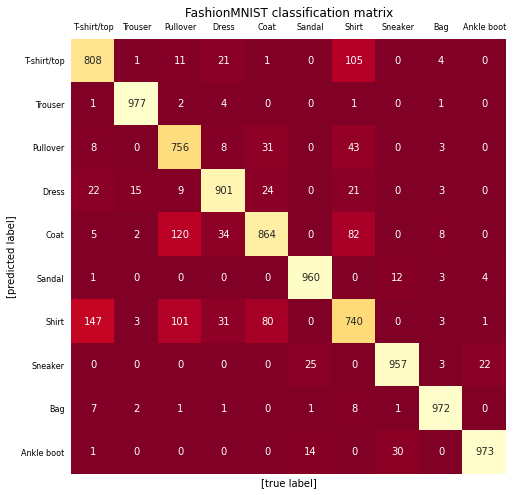

In [ ]:
# determine classification matrix of the predicted and target classes
mat = confusion_matrix(validation_dataset.targets, pred_tensor)

# initialize the plot and define size
plt.figure(figsize=(8, 8))
label_list = ["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
# plot corresponding confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=label_list, yticklabels=label_list)
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)
plt.title('Simple CNN classification matrix')
plt.xlabel('[Ground truth]')
plt.ylabel('[Prediction]');

We can see a relatively prominent cross-line, implying that most of our classifications seem to be correct. However, there are a few outliers: Shirts and T-shirts are confused very often, as well as pullovers which get mistaken as either coats or shirts. Shirts and coats also get confused, but less frequently. Overall, just like the SVM, the misclassifications seem to stem from a source of "difficult classes"

###Recap simple CNN Model
We have an Accuracy of 88.53% for the Testing Dataset, which is already better than the SVM approach. As we can see, some jitter in the end of our training might indicate that our model may need a smaller parameter from Epoch 15 or so onwards. While this result is not bad per se, we will aim to further increase the Accuracy with another idea: We will extend the original Dataset with more Data! 

##Creative Approach: Expand Dataset with fake images using a GAN##

Using a Generative Adversarial Network, we want to try and expand the dataset with pictures of more clothes. After the expansion, the model will have more data to train on and may increase in accuracy! 

**Import necessary Libraries**

We need a whole lot of libraries for this task!

In [10]:
import argparse
import os
import pandas as pd
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from google.colab import files

**Parameter initialisation**

Before setting up the models, we need to set some parameters like the batch size, the number of channels and so on. See comments for further details!

In [11]:
# Root directory for dataset
dataroot = "data/celeba"
# Number of workers for dataloader
workers = 2
# Batch size during training
batch_size = 128
# Spatial size of training images. All images will be resized to this
# size using a transformer.
image_size = 64
# Number of channels in the training images. For color images this is 3
nc = 1
# Size of z latent vector (i.e. size of generator input)
nz = 100
# Size of feature maps in generator
ngf = 64
# Size of feature maps in discriminator
ndf = 64
# Number of training epochs
num_epochs = 5
# Learning rate for optimizers
lr = 0.0002
# Beta1 hyperparam for Adam optimizers
beta1 = 0.5
# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1
# Device that will be used for training
torch.cuda.is_available()
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

**Loading the dataset**

We load again the dataset that we will use. We apply some transforms on the image so the applied architecture of the GAN works best. This is why we enlargen the image to a size of 64x64 pixels.

In [12]:
IMAGE_SIZE = 64
composed = transforms.Compose([transforms.Resize(image_size),transforms.CenterCrop(image_size),transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

train_dataset_gan = dsets.FashionMNIST(root='./data', train = True, download=True, transform=composed)
validation_dataset_gan = dsets.FashionMNIST(root='./data', train=False, download=True, transform=composed)

**Function for retrieving data by category name**

This function will come in handy when generating fake clothes as we can let the generator train on only one class. Of course we only use training data for training!

In [13]:
def get_data(cat):
  tshirts = []
  for i,j in train_dataset_gan:
    if j == cat:
      tshirts.append([i,j])
      
  data = torch.utils.data.DataLoader(tshirts, batch_size=batch_size,shuffle=True, num_workers=workers)
  return data

**Initialize Weights**

Before building the model we initiate some of the weights of the layers.

In [14]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

**Building the Generator**

Now the fun part begins! The Generator in the GAN is the model that turns random noise into a beautiful new fashion collection and tries to fool the Discriminator. Essentially, the Generator is a reversed or "transposed" Convolutional Neural Network itself. In contrast to a convolutional layer, a transposed convolutional layer enlarges the input! The Bach Normalization layers directly normalize the tensors. In the code below you can see that we used the nn.Sequential method for combining the layers of the network.

In [15]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

**Initiating the Generator**

Now that the Generator is built, we just need to initiate it. We also apply the weights that we defined before. Finally, we print the architecture of the Generator. Isn't it a beauty? :)

In [16]:
#Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


**Building the Discriminator**

Now that we have a model that fakes the newest fashion line, we need an expert that can recognize the fakes. Here is where the Discriminator comes into play. The Discriminator itself is a Convolutional Neural Network with no fully connected layers.

In [17]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

**Initiating the Discriminator**

So we've built the discriminator. Again we need to initiate it and can take a look at it. Really looks like a detective, doesn't it?

In [18]:
netD = Discriminator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netD.apply(weights_init)

# Print the model
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


**Initiating some more essentials before training**

Before we can finally start with designing the latest collection of Fashion Items for Zalando, we need to initiate some more essentials. For example, we use the BCE loss-function and the Adam-Optimizer. We also create latent vectors by simply generating random numbers. Here you can see that the Generator really creates Fashion items from nothing more than random numbers - isn't that just purely insane?

In [19]:
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
# the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

**The Training Loop**

We have set up our models and we are ready to go: Here is the training loop!! In each iteration, we train the Discriminator both with all-real and then with all-fake data. The Discriminator learns from its mistakes and updates its weights to become better the next time. Afterwards, we let the Generator fake some clothes and the Discriminator judges whether they are real or not. The Generator learns from the experience he had with the Discriminator and tries to be better next time. This way, the Discriminator gets better at identifying fakes while the Generator gets better at faking clothes. To make the training process more fun, some stats are outputted during the process.

In [20]:
# Training Loop
def training(dataloader):
  # Lists to keep track of progress
  img_list = []
  fake_list = []
  G_losses = []
  D_losses = []
  iters = 0

  print("Starting Training Loop...")
  # For each epoch
  for epoch in range(num_epochs):
      # For each batch in the dataloader
      for i, data in enumerate(dataloader, 0):

          ############################
          # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
          ###########################
          ## Train with all-real batch
          netD.zero_grad()
          # Format batch
          real_cpu = data[0].to(device)
          b_size = real_cpu.size(0)
          label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
          # Forward pass real batch through D
          output = netD(real_cpu).view(-1)
          # Calculate loss on all-real batch
          errD_real = criterion(output, label)
          # Calculate gradients for D in backward pass
          errD_real.backward()
          D_x = output.mean().item()

          ## Train with all-fake batch
          # Generate batch of latent vectors
          noise = torch.randn(b_size, nz, 1, 1, device=device)
          # Generate fake image batch with G
          fake = netG(noise)
          label.fill_(fake_label)
          # Classify all fake batch with D
          output = netD(fake.detach()).view(-1)
          # Calculate D's loss on the all-fake batch
          errD_fake = criterion(output, label)
          # Calculate the gradients for this batch, accumulated (summed) with previous gradients
          errD_fake.backward()
          D_G_z1 = output.mean().item()
          # Compute error of D as sum over the fake and the real batches
          errD = errD_real + errD_fake
          # Update D
          optimizerD.step()

          ############################
          # (2) Update G network: maximize log(D(G(z)))
          ###########################
          netG.zero_grad()
          label.fill_(real_label)  # fake labels are real for generator cost
          # Since we just updated D, perform another forward pass of all-fake batch through D
          output = netD(fake).view(-1)
          # Calculate G's loss based on this output
          errG = criterion(output, label)
          # Calculate gradients for G
          errG.backward()
          D_G_z2 = output.mean().item()
          # Update G
          optimizerG.step()

          # Output training stats
          if i % 50 == 0:
              print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                    % (epoch, num_epochs, i, len(dataloader),
                      errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

          # Save Losses for plotting later
          G_losses.append(errG.item())
          D_losses.append(errD.item())

          # Check how the generator is doing by saving G's output on fixed_noise
          if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
              with torch.no_grad():
                  fake = netG(fixed_noise).detach().cpu()
              fake_list.append(fake)
              img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

          iters += 1
  return netG

**Automate training**

The GAN can only process one category of data at one time. Thus, we have to train a separate Generator and Discriminator on all of the categories. To make our lives easier, we therefore create a Function that takes a trained Generator and outputs fake images. This function is then used in a loop that iterates over all categories.

In [21]:
def create_fake(netG):
  noise = torch.randn(500, nz, 1, 1, device=device)
  fake = netG(noise).detach()
  name = 'fake_500_' + str(cat) + '.pt'
  gen_name = 'gen_' + str(cat) + '.pt'
  dis_name = 'dis' + str(cat) + '.pt'
  torch.save(fake, name)
  #torch.save(netG.state_dict(), gen_name)
  #torch.save(netD.state_dict(), dis_name)
  files.download(name)
  #files.download(gen_name)
  #files.download(dis_name)

**Training (Warning: 6 Hours!)**

Now everything is ready for starting the battle between the Generator and the Discriminator. In this loop we iterate through all categories, get the dataloader of all training samples for this category, train the GAN and then use the Generator for designing fake clothes from random noise. We have out-commented the code for this loop because it took us more than 6 hours to run. For completing the rest of the notebook, running the loop is not necessary as we will import the resulting files from Github. But feel free to just let it run if you have enough time :)

In [ ]:
#for cat in range(10):
#  dataloader = get_data(cat)
#  netG = training(dataloader)
#  create_fake(netG)

**Let's look at some output**

Before proceeding with our CNN, let's look at the output of the GAN. First let's take a look at the Training loss of both the Discriminator and the Generator:

<img align="center" style="max-width: 500px; height: 500px" src="https://github.com/PaulSt4/ML_HSG/blob/main/Loss%20GAN.png?raw=1">

Looks good! Neither the Discriminator nor the Generator were too strong to always outperform the other, so they could learn from each other and improve together until the very end of the training process.

**The latest Fake-Fashion Collection**

Now the moment you've been all waiting for: We present to use some fashion articles that are 100% fake and generated from random noise as you have seen in the code above. 

Let us start with some Trousers. On the left side you can see the real images from Zalando and on the right sight the fake trousers. As you can see, our Generator liked loosely fitting and bright trousers the most. But there are also some very skinny denim jeans.

<img align="center" style="max-width: 500px; height: 500px" src="https://github.com/PaulSt4/ML_HSG/blob/main/trousers.png?raw=1">

Next, we want to present you our fake collection of shoes. Again on the left side you can see real, and on the right side fake images. Our Generator liked playing around with contrasting colours on some shoes. I especially like the ones with a different coloured sole compared to the rest of the shoe!

<img align="center" style="max-width: 500px; height: 500px" src="https://github.com/PaulSt4/ML_HSG/blob/main/GAN%20Shoe.png?raw=1">

As the last collection of our fake clothings we want to present you our fake T-Shirts:

<img align="center" style="max-width: 500px; height: 500px" src="https://github.com/PaulSt4/ML_HSG/blob/main/GAN%20TShirt.png?raw=1">

Nicely done, dear Generator!!!

**Retrieve faked images from Github**

To keep you from having to run the training loop, we saved the output images and uploaded them to Github! We created 1000 Fake image per class. The following code is used to download the fake images.

In [22]:
!wget https://github.com/PaulSt4/ML_HSG/blob/main/fake_images/fake_small_0.pt?raw=true
!wget https://github.com/PaulSt4/ML_HSG/blob/main/fake_images/fake_small_1.pt?raw=true
!wget https://github.com/PaulSt4/ML_HSG/blob/main/fake_images/fake_small_2.pt?raw=true
!wget https://github.com/PaulSt4/ML_HSG/blob/main/fake_images/fake_small_3.pt?raw=true
!wget https://github.com/PaulSt4/ML_HSG/blob/main/fake_images/fake_small_4.pt?raw=true
!wget https://github.com/PaulSt4/ML_HSG/blob/main/fake_images/fake_small_5.pt?raw=true
!wget https://github.com/PaulSt4/ML_HSG/blob/main/fake_images/fake_small_6.pt?raw=true
!wget https://github.com/PaulSt4/ML_HSG/blob/main/fake_images/fake_small_7.pt?raw=true
!wget https://github.com/PaulSt4/ML_HSG/blob/main/fake_images/fake_small_8.pt?raw=true
!wget https://github.com/PaulSt4/ML_HSG/blob/main/fake_images/fake_small_9.pt?raw=true

--2021-05-26 21:01:17--  https://github.com/PaulSt4/ML_HSG/blob/main/fake_images/fake_small_0.pt?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/PaulSt4/ML_HSG/raw/main/fake_images/fake_small_0.pt [following]
--2021-05-26 21:01:17--  https://github.com/PaulSt4/ML_HSG/raw/main/fake_images/fake_small_0.pt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PaulSt4/ML_HSG/main/fake_images/fake_small_0.pt [following]
--2021-05-26 21:01:17--  https://raw.githubusercontent.com/PaulSt4/ML_HSG/main/fake_images/fake_small_0.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HT

**Import the fake images again**

Now that we downloaded the fake images from Github, we need to upload it to the Jupyter Notebook again. Fortunately, this is quite easy. Please make sure, you have refreshed your file folder on Google Colab to make sure, that the download from Github worked!

In [23]:
fake_0 = torch.load('/content/fake_small_0.pt?raw=true')
fake_1 = torch.load('/content/fake_small_1.pt?raw=true')
fake_2 = torch.load('/content/fake_small_2.pt?raw=true')
fake_3 = torch.load('/content/fake_small_3.pt?raw=true')
fake_4 = torch.load('/content/fake_small_4.pt?raw=true')
fake_5 = torch.load('/content/fake_small_5.pt?raw=true')
fake_6 = torch.load('/content/fake_small_6.pt?raw=true')
fake_7 = torch.load('/content/fake_small_7.pt?raw=true')
fake_8 = torch.load('/content/fake_small_8.pt?raw=true')
fake_9 = torch.load('/content/fake_small_9.pt?raw=true')

**Labelling the fake data**

To use the fake data for training our CNN, we need to concatenate the data sets and also label them. We do that in the following code. First, we need to resize the images to 28x28. Afterwards we simply add the label to each entry and append the images as a tuple into one list. We did this in four loops, since my RAM was overloaded when trying it in one go :)

In [24]:
p = transforms.Resize((28,28))
gan_data = []

for i in range(3000):
  if i < 1000: 
    temp = p(fake_0)[i][[0]]
    j = 0
  elif i < 2000:
    l = i - 1000 
    temp = p(fake_1)[l][[0]]
    j = 1
  elif i < 3000: 
    l = i - 2000
    temp = p(fake_2)[l][[0]]
    j = 2
  gan_data.append((temp,j))

for i in range(3000,6000):
  if i < 4000:
    l = i - 3000  
    temp = p(fake_3)[l][[0]]
    j = 3
  elif i < 5000:
    l = i - 4000 
    temp = p(fake_4)[l][[0]]
    j = 4
  elif i < 6000: 
    l = i - 5000
    temp = p(fake_5)[l][[0]]
    j = 5
  gan_data.append((temp,j))

for i in range(6000,8000):  
  if i < 7000: 
    l = i - 6000
    temp = p(fake_6)[l][[0]]
    j = 6
  elif i < 8000: 
    l = i - 7000
    temp = p(fake_7)[l][[0]]
    j = 7
  gan_data.append((temp,j))

for i in range(8000,10000):  
  if i < 9000: 
    l = i - 8000
    temp = p(fake_8)[l][[0]]
    j = 8
  elif i < 10000: 
    l = i - 9000
    temp = p(fake_9)[l][[0]]
    j = 9
  gan_data.append((temp,j))

**Combining FashionMNIST Dataset with the fake data from the GAN**

Now we need to combine the original Zalando FashionMNIST data with the newly created list of fake images. We do that by simply concatening the lists and then creating a new DataLoader object from that.

In [25]:
full_data = list(train_dataset) + gan_data
train_loader = torch.utils.data.DataLoader(full_data, shuffle=True, batch_size=100)
train_val_loader = torch.utils.data.DataLoader(full_data,shuffle=True, batch_size = 2000)

**Learning the CNN using the Fake Images and FashionMNIST**

Now we are finally done with faking data and pre-processing it into one DataLoader object! This is analogous to the CNN in the first task. We use exactly the same hyperparameters. We initiate everything again to make sure, everything works like we want it to work.

In [26]:
train_accuracy_list=[]
test_accuracy_list=[]
##################
accuracy_list = []
cost_list = []
COST = 0
criterion = nn.CrossEntropyLoss()
lera = 0.05
n_epochs = 20 

model = CNN(out_1=3, out_2=12)
optimizer = torch.optim.SGD(model.parameters(), lr = lera)

train_model(n_epochs) 

Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete


Let us then see how it performed!

**Inspecting Training Accuracy**

Let us again inspect the training Accuracy:

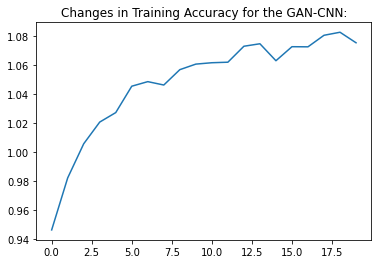

The highest Training Accuracy was 1.0754


In [27]:
plt.plot(train_accuracy_list)
plt.title("Changes in Training Accuracy for the GAN-CNN:")
plt.show()

print("The highest Training Accuracy was {}".format(round(train_accuracy_list[-1],4)))

Interesting! The training accuracy seems to not have changed much, but what about testing?

**Inspecting Testing Accuracy**

Let us then take a look at the testing Accuracy:

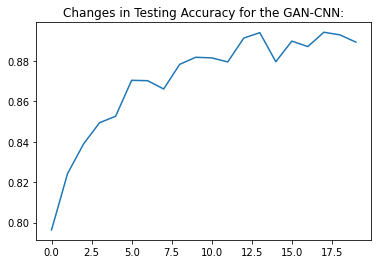

The highest Training Accuracy was 0.8894


In [28]:
plt.plot(test_accuracy_list)
plt.title("Changes in Testing Accuracy for the GAN-CNN:")
plt.show()

print("The highest Training Accuracy was {}".format(round(test_accuracy_list[-1],4)))

Sadly, it does not seem that the GAN has changed the model itself a lot. We can therefore conclude that the data (or lack thereof) does not seem to be the problem. Let us buid another confusion matrix: 

**Preparing the Confusion Matrix**

Just like before, we will retrieve, concatenate and double-check:

In [29]:
predictions = []
for x_test, y_test in validation_loader:
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            predictions.append(yhat)

In [30]:
pred_tensor = torch.cat((predictions[0], predictions[1]), 0)
metrics.accuracy_score(validation_dataset.targets, pred_tensor)

0.8894

Great! 

**Building Matrix**

Just like the other Confusion Matrix, we will now build one for the GAN-CNN-Model

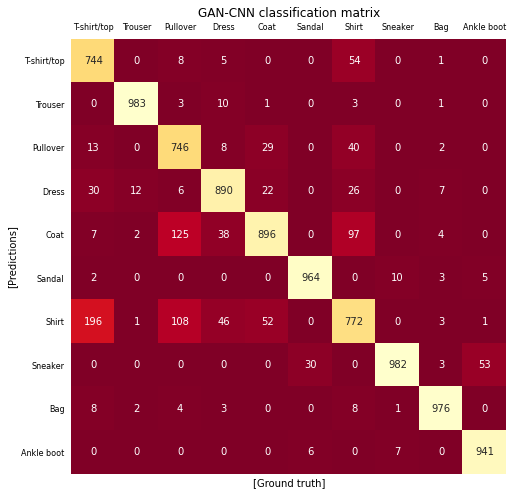

In [31]:
# determine classification matrix of the predicted and target classes
mat = confusion_matrix(validation_dataset.targets, pred_tensor)

# initialize the plot and define size
plt.figure(figsize=(8, 8))
label_list = ["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
# plot corresponding confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlOrRd_r', xticklabels=label_list, yticklabels=label_list)
plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, left = False, labeltop=True)
plt.title('GAN-CNN classification matrix')
plt.xlabel('[Ground truth]')
plt.ylabel('[Predictions]');

###Recap GAN_CNN Model

As you can see, after 20 epochs, the training accuracy was 90% and the testing accuracy was 89%. The model with the fake data from the GAN thus performed about as good as without the fake data. This shows us that simply adding more data does not necessarily improve a model. Since many items of the new fake collection are looking quite similar (though being stunningly beautiful), this does not add much information that the CNN can learn. Still, it was an interesting process and designing the latest collection of Zalando was great fun :)

##Step 3: Professional Approach: Using the well-known RESNET architecture##

In the previous approach we saw that being creative does not always pay off. This is why we did some research to find out which models are most successful for image classification tasks. One of the most used models is the RESNET, which is a very deep Convolutional Neural Network. Fortunately, torch has this model built into the module. We used the RESNET18 architecture, since it already has an incredible capacity for learning and learns a bit faster than RESNET50, which we also tried out. 

Let's start off by importing some essential libraries!


In [ ]:
import torch
from torchvision.models import resnet18
from torch import nn
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
from torchvision.transforms import ToTensor
!pip install pytorch_lightning
import pytorch_lightning as pl
from pytorch_lightning.core.decorators import auto_move_data

     |████████████████████████████████| 808kB 11.5MB/s 
     |████████████████████████████████| 276kB 32.3MB/s 
     |████████████████████████████████| 10.6MB 39.6MB/s 
     |████████████████████████████████| 112kB 41.6MB/s 
     |████████████████████████████████| 645kB 35.6MB/s 
     |████████████████████████████████| 829kB 35.5MB/s 
     |████████████████████████████████| 1.3MB 31.9MB/s 
     |████████████████████████████████| 143kB 42.4MB/s 
     |████████████████████████████████| 296kB 31.5MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=b9759478ca4d418322800d58730d3890d25c4948ace7d599cc7fe881e04a787f
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
ERROR: tensorflow 2.5.0 has requirement tensorboard~=2.5, but you'll have tensorboard 2.4.1 which is incompatible.
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Suc

**Getting the Data**

Analogously to what we have already seen in the other approaches, we load the data and create a DataLoader object.

In [ ]:
train_ds = dsets.FashionMNIST(root='./data', train=True, download=True, transform=ToTensor())
test_ds = dsets.FashionMNIST(root='./data', train=False, download=True, transform=ToTensor())

train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=64)

**Instantiating the Resnet**

It is incredibly easy to instantiate a Resnet. We simply pass define the resnet18 as our model! Since our data only has one channel, we have to tweak the very first layer of the net a little bit. We also directly define our loss-function to be the Cross-Entropy Loss

In [ ]:
class ResNetFashionMNIST(pl.LightningModule):
  def __init__(self):
    super().__init__()
    self.model = resnet18(num_classes=10)
    self.model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    self.loss = nn.CrossEntropyLoss()

  @auto_move_data
  def forward(self, x):
    return self.model(x)
  
  def training_step(self, batch, batch_no):
    x, y = batch
    logits = self(x)
    loss = self.loss(logits, y)
    return loss
  
  def configure_optimizers(self):
    return torch.optim.RMSprop(self.parameters(), lr=0.005)

model = ResNetFashionMNIST()

**Setting up the Training**

For training the Resnet, we can implement a so-called "trainer" from Pytorch Lighning. This Trainer makes training very easy by automating most of the needed code. All we need to do is tell him how many epochs to train the model for!

In [ ]:
trainer = pl.Trainer(
    gpus=0,
    max_epochs=20, 
    progress_bar_refresh_rate=20
)

GPU available: True, used: False
TPU available: False, using: 0 TPU cores
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  warnings.warn(*args, **kwargs)


**Training the Resnet**

Now we simply have to start the training-loop. This is very easy as well! Attention, this will also take some time to train!!

In [ ]:
trainer.fit(model, train_dl)


  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 11.2 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.701    Total estimated model params size (MB)


**Saving the Model**

After training, let's save the Model!

In [ ]:
from tqdm.autonotebook import tqdm

trainer.save_checkpoint("resnet18_mnist.pt")
inference_model = ResNetFashionMNIST.load_from_checkpoint("resnet18_mnist.pt", map_location="cpu")

**Getting the Predictions**

After having trained the Model, we can go ahead to get the predictions for the dataset. We write a function for predicting and then load batches of the test, and of the training-data to calculate the train/test-accuracy!

In [ ]:
def get_prediction(x, model: pl.LightningModule):
  model.freeze() # prepares model for predicting
  probabilities = torch.softmax(model(x), dim=1)
  predicted_class = torch.argmax(probabilities, dim=1)
  return predicted_class, probabilities

true_y, pred_y = [], []
for batch in tqdm(iter(test_dl), total=len(test_dl)):
  x, y = batch
  true_y.extend(y)
  preds, probs = get_prediction(x, inference_model)
  pred_y.extend(preds.cpu())

true_y_train, pred_y_train = [], []
for batch in tqdm(iter(train_dl), total=len(train_dl)):
  x, y = batch
  true_y_train.extend(y)
  preds, probs = get_prediction(x, inference_model)
  pred_y_train.extend(preds.cpu())



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(classification_report(true_y, pred_y, digits=3))
print(classification_report(true_y_train, pred_y_train,digits=3))
cm =confusion_matrix(true_y, pred_y,)
label_list = ["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

              precision    recall  f1-score   support

           0      0.849     0.879     0.864      1000
           1      0.995     0.979     0.987      1000
           2      0.710     0.934     0.807      1000
           3      0.886     0.930     0.907      1000
           4      0.846     0.737     0.788      1000
           5      0.989     0.967     0.978      1000
           6      0.836     0.620     0.712      1000
           7      0.937     0.981     0.958      1000
           8      0.985     0.987     0.986      1000
           9      0.979     0.955     0.967      1000

    accuracy                          0.897     10000
   macro avg      0.901     0.897     0.895     10000
weighted avg      0.901     0.897     0.895     10000

              precision    recall  f1-score   support

           0      0.897     0.937     0.917      6000
           1      0.998     0.993     0.996      6000
           2      0.759     0.974     0.853      6000
           3      0.938 

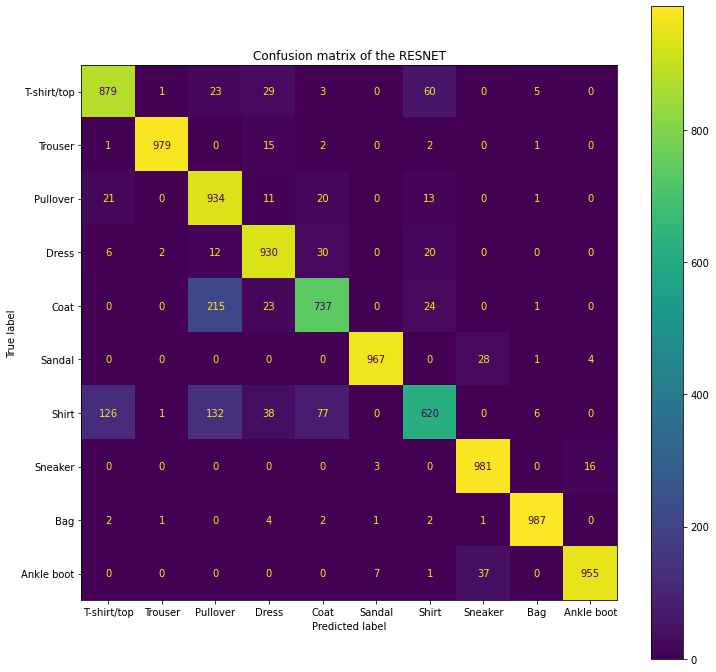

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_list)
fig, ax = plt.subplots(figsize=(12,12))
plt.title('Confusion matrix of the RESNET')
disp.plot(values_format = "d", ax=ax)
plt.show()
#plt.figure(figsize=(10,10))

In [ ]:
#plt.figure(figsize=(10,10))

**How good was the Resnet?**

After 20 epochs, the Resnet has a accuracy of 98.4%  on the training data and 91.1% on the test data. At first sight, this does not look much better than the basic CNN we came up with in the beginning of the notebook. However, keep in mind that the Resnet18 has around 11 Million (!) parameters - training them takes some time! 

To assess the potential accuracy of our model, we can look at some research that has implemented the model for a longer time than we could. These were the results:

<img align="center" style="max-width: 500px; height: 500px" src="https://github.com/PaulSt4/ML_HSG/blob/main/resnet.PNG?raw=1">

So if we let the resnet18 train for 125 epochs, we would reach a testing accuracy more than 95%!!! Training one epoch of resnet18 on a cpu took us around 15 minutes. Consequently, 125 epochs will take around 32 Hours of non-stop training. We tried this, but unfortunately our internet connection was not stable enough that the model would run without disconnecting the Google Colab Notebook. But feel free to let the Model train for more epochs by simply changing the "max_epochs" parameter of the Trainer - have fun!